## If in Colab

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
in_colab = False
floatType = 32
last_data_idx = -1

In [3]:
import tensorflow as tf
if in_colab:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
if floatType == 16:
    tf.keras.backend.set_floatx('float16')

In [4]:
if in_colab:
    import sys
    data_dir = "/content/drive/MyDrive/data/"
    VOC2012_path = data_dir
    tracker_path = data_dir
    sys.path.append(tracker_path)
    ssd_weights_path = data_dir + "ssd_weights_epoch_0380.h5"
    checkpoint_filepath = data_dir + "weights/"
else:
    data_dir = "../data/"
    VOC2012_path = data_dir + "VOCdevkit/"
    tracker_path = "../Tracking_SSD_ReID/"
    ssd_weights_path = data_dir + "ssd_weights_epoch_0380.h5"
    checkpoint_filepath = data_dir + "segmentation_weights/"

## Import model

In [5]:
from models.FCN8 import FCN8
model = FCN8(tracker_ssd_path = tracker_path, 
             ssd_weights_path = ssd_weights_path,
             floatType = floatType,
             n_classes = 3)
model(tf.zeros((32,300,300,3))).shape

TensorShape([32, 300, 300, 3])

In [5]:
model_saved = tf.keras.models.load_model("../data/transfer_learning_final_weights/")

In [6]:
from utils.eval import *

Calculated legend: size 33, (x, y) pos (200.4, 50)
New legend: size 20.8, (x, y) pos (250, 50)


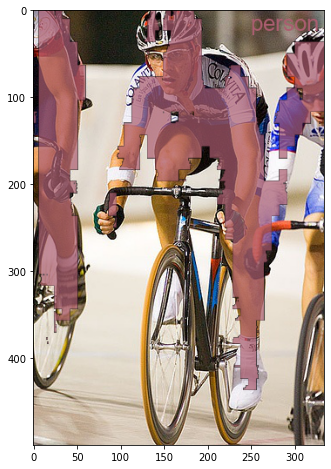

In [7]:
pltPredOnImg(model_saved, "../data/VOCdevkit/VOC2012/JPEGImages_forSeg/2007_000129.jpg",
             save_path="../data/results.png", classes = {2: "person"},
             legend_size=0.8, legend_xpos=250, legend_ypos=50)

In [8]:
video_path = "../data/video/person_dog.mp4"
out_path = "../data/video/"
pltPredOnVideo(model_saved, video_path, out_path + "person_dog_segmentation_v2.gif",
               start_idx=60, end_idx=210, skip=2, legend_size=1.2,
               resize=(500,200), fps=22, input_shape=(300,300), classes = {1: "dog", 2: "person"})

 30%|███████████████████████▌                                                        | 62/210 [00:00<00:01, 106.05it/s]

Calculated legend: size 17, (x, y) pos (256.2, 20)
New legend: size 24.0, (x, y) pos (256.2, 20)


100%|████████████████████████████████████████████████████████████████████████████████| 210/210 [00:17<00:00, 12.19it/s]
